In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader,random_split
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from helper_functions import accuracy_fn
from tqdm import tqdm
import random


In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [16]:
#prepare trainloader and test loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
dataset = torchvision.datasets.MNIST(root='./data',transform=transform)

train_size = int(0.9 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset =random_split(dataset, [train_size, test_size])
batch_size = 32
trainloader = DataLoader(train_dataset, batch_size, shuffle=True,)
testloader = DataLoader(test_dataset, batch_size, shuffle=False,)

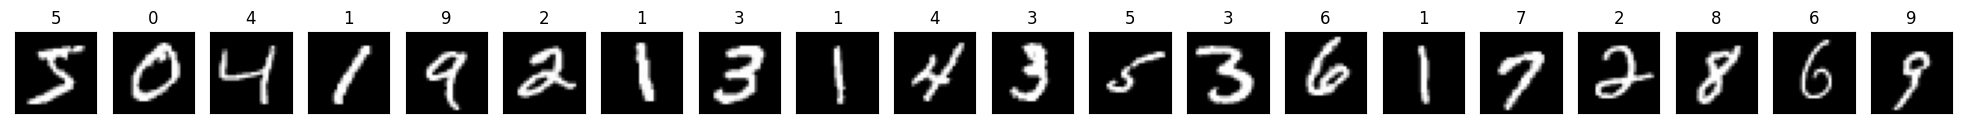

In [17]:
fig = plt.figure(figsize=(25, 4))
for idx in range(20):
    image,label=dataset[idx]
    ax = fig.add_subplot(2, 20, idx+1, xticks=[], yticks=[])
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(str(label))

In [18]:
#build model
class Number_classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=15,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=15,out_channels=10,kernel_size=3,stride=1,padding=1),
            nn.Softmax(dim=1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*28*28, 
                      out_features=10)
        )
    def forward(self,x):
        x = self.layer(x)   
        x = self.classifier(x)
        return x
    
model= Number_classifier().to(device)

In [19]:
def test_step(model: torch.nn.Module,):
    test_loss, test_acc = 0, 0
    model.to(device)
    loss_fn = nn.CrossEntropyLoss()
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in tqdm(testloader,desc="Testing...", ncols=75):
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(testloader)
        test_acc /= len(testloader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

def train_step(model):    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)
    train_loss, train_acc = 0, 0
    epoch = 10
        
    for i in range (epoch):
    
        for  X, y in tqdm(trainloader,
               desc="Training...", ncols=75):
            
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            y_pred = model(X)

            # 2. Calculate loss
            loss = loss_fn(y_pred, y)
            train_loss += loss
            train_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

            # 3. Optimizer zero grad
            optimizer.zero_grad()

            # 4. Loss backward
            loss.backward()

            # 5. Optimizer step
            optimizer.step()


    # Calculate loss and accuracy per epoch and print out what's happening
        train_loss /= len(trainloader)
        train_acc /= len(trainloader)
        print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
        test_step(model)



In [20]:
train_step(model)

Training...: 100%|█████████████████████| 1688/1688 [00:17<00:00, 94.14it/s]


Train loss: 0.31657 | Train accuracy: 90.09%


Testing...: 100%|███████████████████████| 188/188 [00:00<00:00, 211.84it/s]


Test loss: 0.12945 | Test accuracy: 96.41%



Training...: 100%|████████████████████| 1688/1688 [00:10<00:00, 155.92it/s]


Train loss: 0.11433 | Train accuracy: 96.66%


Testing...: 100%|███████████████████████| 188/188 [00:00<00:00, 190.05it/s]


Test loss: 0.08947 | Test accuracy: 97.56%



Training...: 100%|████████████████████| 1688/1688 [00:10<00:00, 154.38it/s]


Train loss: 0.08189 | Train accuracy: 97.68%


Testing...: 100%|███████████████████████| 188/188 [00:00<00:00, 192.19it/s]


Test loss: 0.07686 | Test accuracy: 97.79%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 151.25it/s]


Train loss: 0.06685 | Train accuracy: 98.09%


Testing...: 100%|███████████████████████| 188/188 [00:01<00:00, 178.93it/s]


Test loss: 0.06821 | Test accuracy: 98.17%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 151.04it/s]


Train loss: 0.05664 | Train accuracy: 98.40%


Testing...: 100%|███████████████████████| 188/188 [00:01<00:00, 181.79it/s]


Test loss: 0.06639 | Test accuracy: 98.17%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 149.12it/s]


Train loss: 0.04973 | Train accuracy: 98.60%


Testing...: 100%|███████████████████████| 188/188 [00:01<00:00, 152.07it/s]


Test loss: 0.06073 | Test accuracy: 98.37%



Training...: 100%|████████████████████| 1688/1688 [00:12<00:00, 139.60it/s]


Train loss: 0.04437 | Train accuracy: 98.77%


Testing...: 100%|███████████████████████| 188/188 [00:00<00:00, 193.32it/s]


Test loss: 0.07347 | Test accuracy: 97.74%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 143.69it/s]


Train loss: 0.03929 | Train accuracy: 98.94%


Testing...: 100%|███████████████████████| 188/188 [00:00<00:00, 198.85it/s]


Test loss: 0.06184 | Test accuracy: 98.27%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 145.50it/s]


Train loss: 0.03600 | Train accuracy: 99.08%


Testing...: 100%|███████████████████████| 188/188 [00:01<00:00, 177.57it/s]


Test loss: 0.05617 | Test accuracy: 98.29%



Training...: 100%|████████████████████| 1688/1688 [00:11<00:00, 143.87it/s]


Train loss: 0.03310 | Train accuracy: 99.13%


Testing...: 100%|███████████████████████| 188/188 [00:01<00:00, 164.52it/s]

Test loss: 0.05214 | Test accuracy: 98.45%



In [21]:
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f="models/03_numberclassifier.pth") 

In [22]:
loaded_model = Number_classifier()
loaded_model.load_state_dict(torch.load("models/03_numberclassifier.pth"))
loaded_model.to(device)
loaded_model

Number_classifier(
  (layer): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Softmax(dim=1)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=7840, out_features=10, bias=True)
  )
)

In [23]:
def make_decision(data,model):
    print(len(data))
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = sample.to(device)
            sample = torch.unsqueeze(sample,dim=1) #data are loaded in batches with [32,1,28,28] shape so i have do add 1 more dim
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
    pred_classes = torch.stack(pred_probs).argmax(dim=1)  
    return  pred_classes

In [40]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k=36):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[1].shape}\nTest sample label: {test_labels[1]} ({[test_labels[1]]})")
pred_probs= make_decision(model=loaded_model, 
                             data=test_samples)

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 ([6])
36


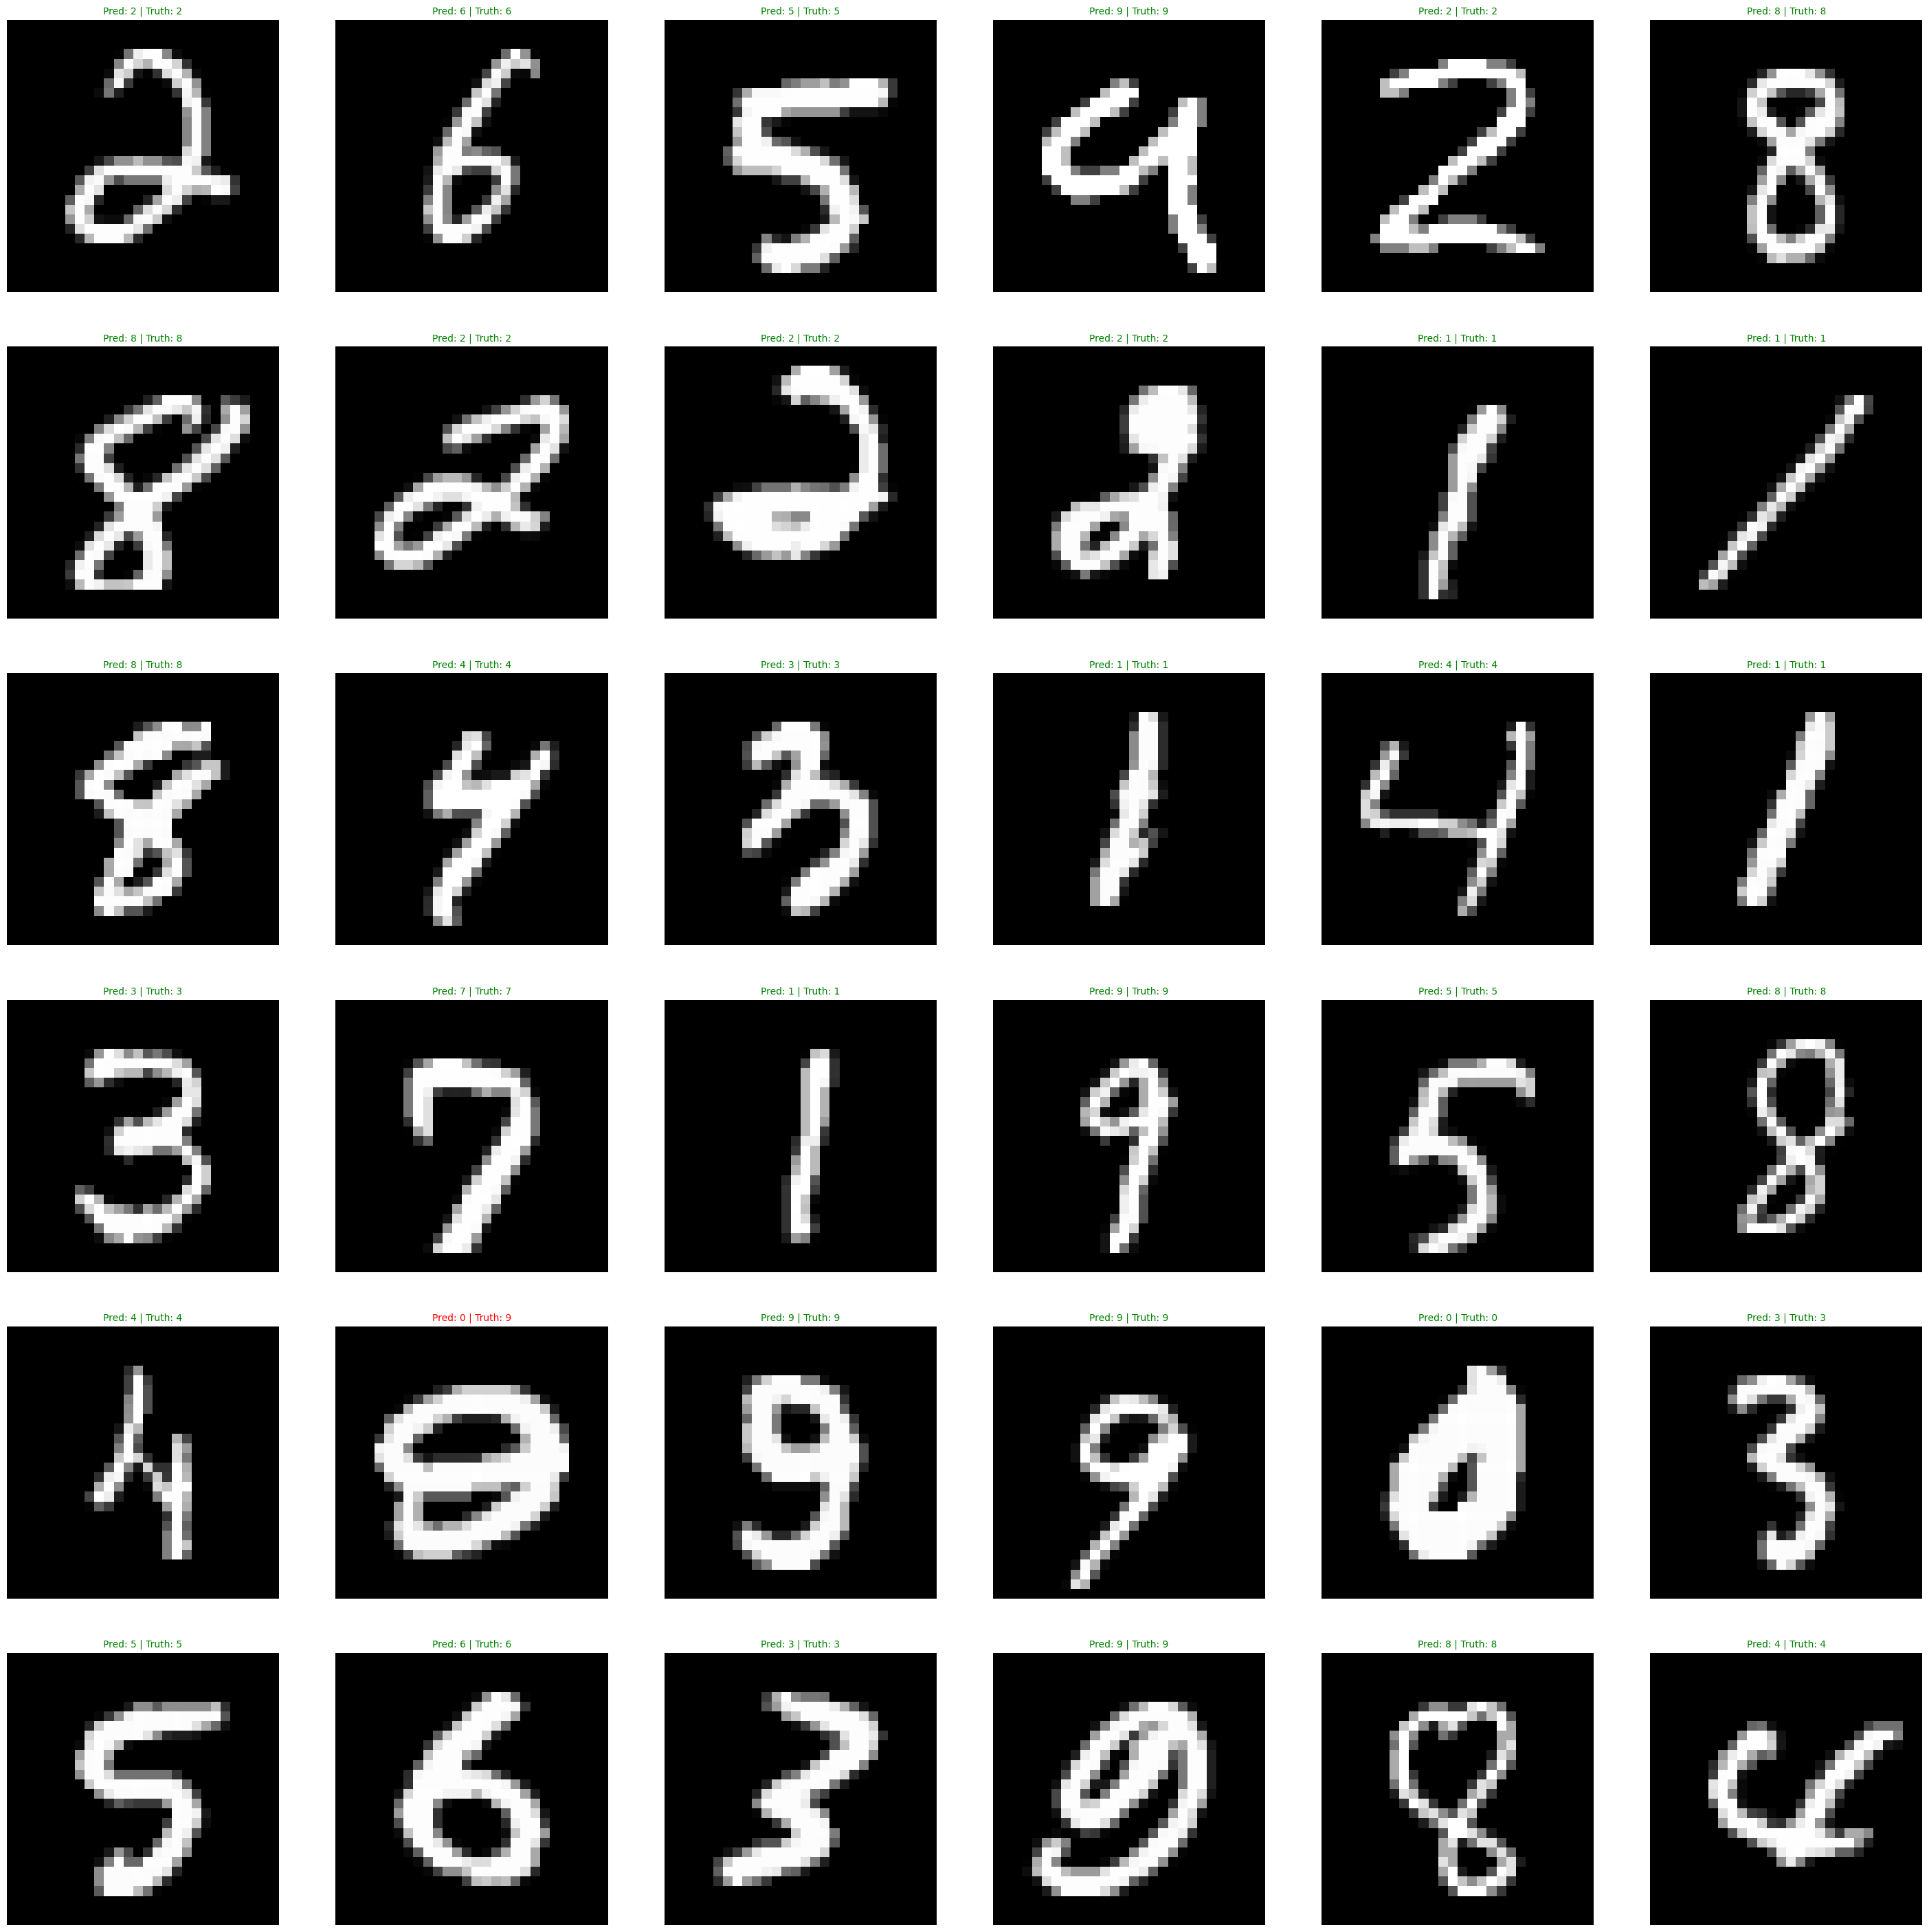

In [42]:
# Plot predictions
plt.figure(figsize=(36, 36))
nrows = 6
ncols = 6
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = int(pred_probs[i])

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = int(test_labels[i])

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)